/var/folders/36/9xwcvlgn3v15668c8s8lfgd80000gq/T/ipykernel_28773/2576066904.py:31: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/sheillaschool/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


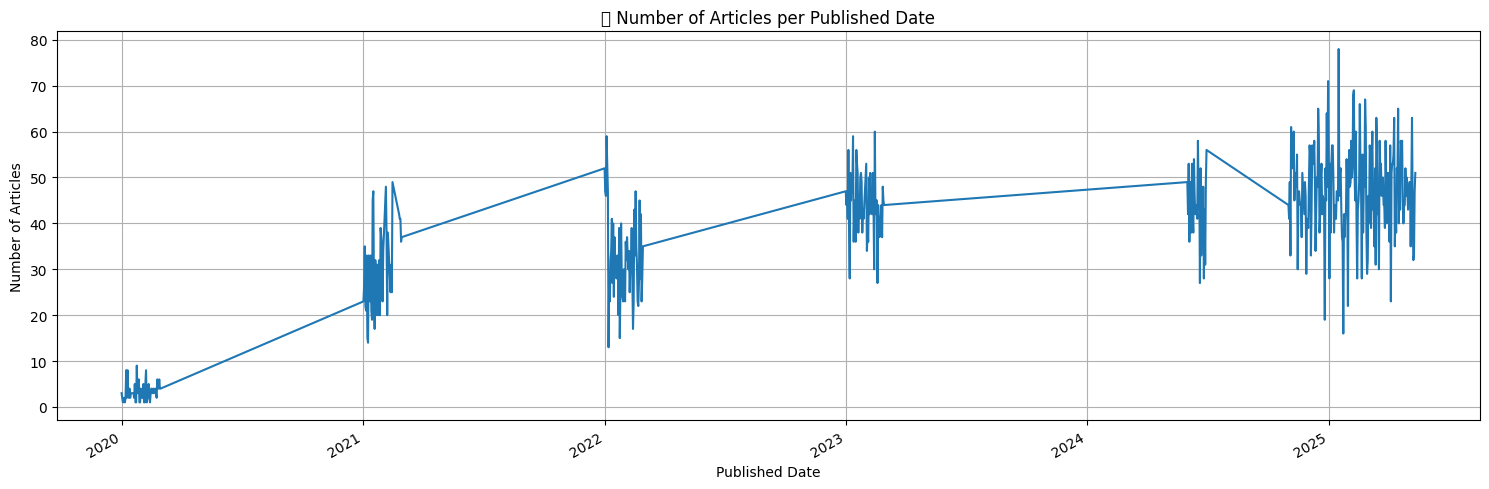


📌 Top 5 Dates with Most Articles:
date
2025-01-16    78
2024-12-31    71
2025-02-08    69
2025-02-07    68
2025-02-25    67
Name: count, dtype: int64


In [ ]:
# === CONFIG ===
import json
import pandas as pd
import matplotlib.pyplot as plt

JSON_PATH = "/Users/sheillaschool/Documents/final/Thesis_PredictingNewsOutdatedness_LogisticDecay/data/raw/raw.json"
with open(JSON_PATH, "r", encoding="utf-8") as f:
    data = json.load(f)


df = pd.DataFrame.from_dict(data, orient="index")
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df = df.dropna(subset=["date"])

# === GROUP & COUNT BY DATE ===
date_counts = df["date"].value_counts().sort_index()

# === PLOT DISTRIBUTION ===
plt.figure(figsize=(15, 5))
date_counts.plot(kind="line", title="🗓️ Number of Articles per Published Date")
plt.xlabel("Published Date")
plt.ylabel("Number of Articles")
plt.grid(True)
plt.tight_layout()
plt.show()

# === TOP 5 PEAK DATES ===
print("\n📌 Top 5 Dates with Most Articles:")
print(date_counts.sort_values(ascending=False).head())


📊 Summary Length Statistics:
count    29734.000000
mean       245.088955
std        381.426783
min          0.000000
25%        118.000000
50%        169.000000
75%        344.000000
max      22874.000000
Name: summary_length, dtype: float64

📉 25th percentile (Q1) value: 118 characters


/var/folders/36/9xwcvlgn3v15668c8s8lfgd80000gq/T/ipykernel_28773/1154420133.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


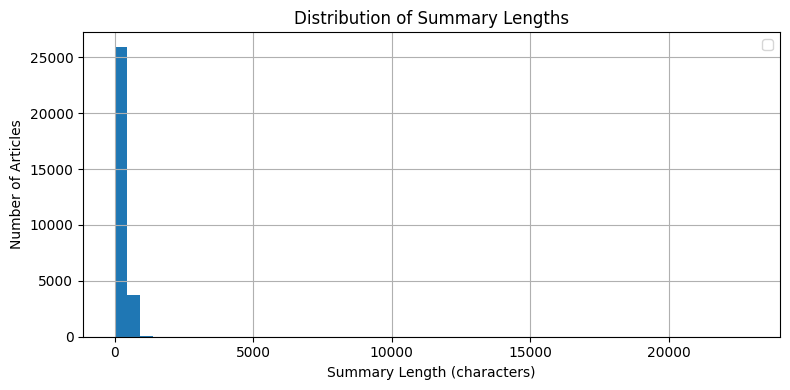

In [12]:
import json
import pandas as pd

# === CONFIG ===
INPUT_PATH = "/Users/sheillaschool/Documents/final/thesis_final/data/raw/main_dataset/main_dataset.json"

# === LOAD DATA ===
with open(INPUT_PATH, "r", encoding="utf-8") as f:
    data = json.load(f)

df = pd.DataFrame.from_dict(data, orient="index")

# === CALCULATE SUMMARY LENGTH ===
df["summary_length"] = df["summary"].fillna("").apply(len)

# === SUMMARY STATISTICS ===
print("📊 Summary Length Statistics:")
print(df["summary_length"].describe())

# === 25TH PERCENTILE ===
q1 = df["summary_length"].quantile(0.25)
print(f"\n📉 25th percentile (Q1) value: {q1:.0f} characters")

# === OPTIONAL: HISTOGRAM VISUALIZATION ===
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
df["summary_length"].hist(bins=50)
plt.title("Distribution of Summary Lengths")
plt.xlabel("Summary Length (characters)")
plt.ylabel("Number of Articles")
plt.legend()
plt.tight_layout()
plt.show()


📊 Summary Length Statistics:
count    29734.000000
mean       245.088955
std        381.426783
min          0.000000
25%        118.000000
50%        169.000000
75%        344.000000
max      22874.000000
Name: summary_length, dtype: float64

📉 25th percentile (Q1) value: 118 characters


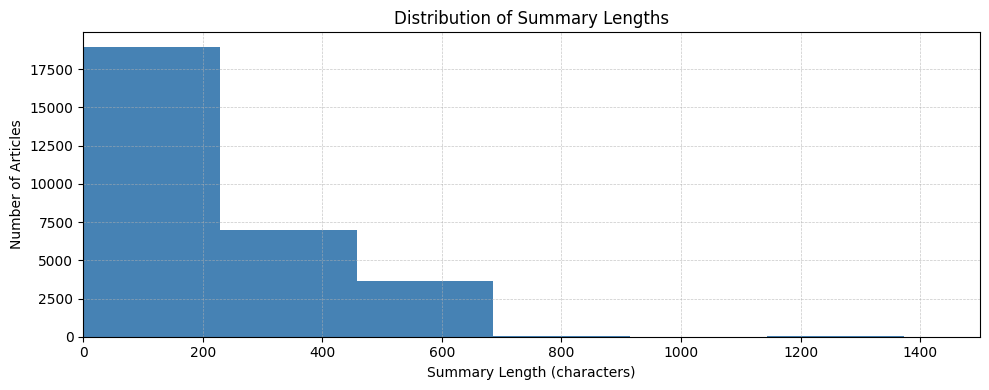

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# === CONFIG ===
INPUT_PATH = "/Users/sheillaschool/Documents/final/thesis_final/data/raw/main_dataset/main_dataset.json"
X_MAX = 1500  # ⬅️ You can adjust this to zoom in further if needed

# === LOAD DATA ===
with open(INPUT_PATH, "r", encoding="utf-8") as f:
    data = json.load(f)

df = pd.DataFrame.from_dict(data, orient="index")

# === CALCULATE SUMMARY LENGTH ===
df["summary_length"] = df["summary"].fillna("").apply(lena)

# === SUMMARY STATISTICS ===
print("📊 Summary Length Statistics:")
print(df["summary_length"].describe())

# === 25TH PERCENTILE ===
q1 = df["summary_length"].quantile(0.25)
print(f"\n📉 25th percentile (Q1) value: {q1:.0f} characters")

# === PLOT CLEAN HISTOGRAM ===
plt.figure(figsize=(10, 4))
plt.hist(df["summary_length"], bins=100, color="steelblue", edgecolor="none")
plt.xlim(0, X_MAX)
plt.xlabel("Summary Length (characters)")
plt.ylabel("Number of Articles")
plt.title("Distribution of Summary Lengths")
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


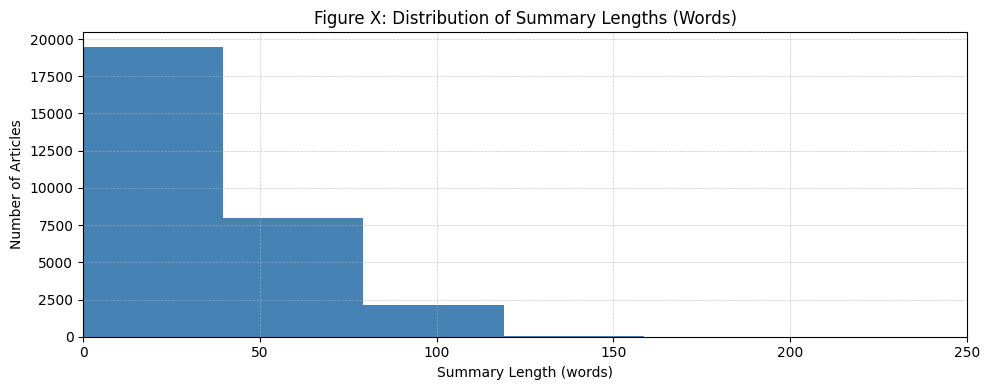

In [22]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# === CONFIG ===
INPUT_PATH = "/Users/sheillaschool/Documents/final/thesis_final/data/raw/main_dataset/main_dataset.json"
X_MAX_WORDS = 250  # You can adjust based on distribution

# === LOAD DATA ===
with open(INPUT_PATH, "r", encoding="utf-8") as f:
    data = json.load(f)

df = pd.DataFrame.from_dict(data, orient="index")
df["summary"] = df["summary"].fillna("")

# === WORD COUNT ===
df["summary_word_count"] = df["summary"].apply(lambda x: len(x.split()))

# === PLOT ===
plt.figure(figsize=(10, 4))
plt.hist(df["summary_word_count"], bins=100, color="steelblue", edgecolor="none")
plt.xlim(0, X_MAX_WORDS)
plt.xlabel("Summary Length (words)")
plt.ylabel("Number of Articles")
plt.title("Figure X: Distribution of Summary Lengths (Words)")
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


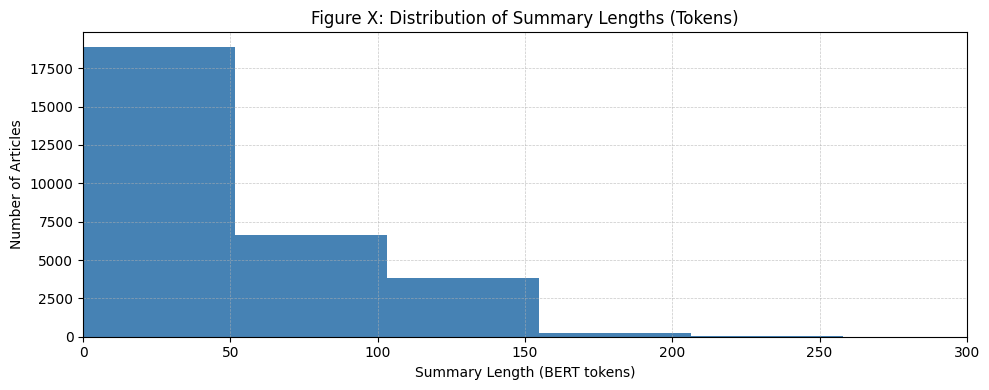

In [23]:
from transformers import BertTokenizer

# === LOAD TOKENIZER ===
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# === TOKEN COUNT ===
df["summary_token_count"] = df["summary"].apply(lambda x: len(tokenizer.tokenize(x)))

# === PLOT ===
plt.figure(figsize=(10, 4))
plt.hist(df["summary_token_count"], bins=100, color="steelblue", edgecolor="none")
plt.xlim(0, 300)  # Adjust as needed to zoom in
plt.xlabel("Summary Length (BERT tokens)")
plt.ylabel("Number of Articles")
plt.title("Figure X: Distribution of Summary Lengths (Tokens)")
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


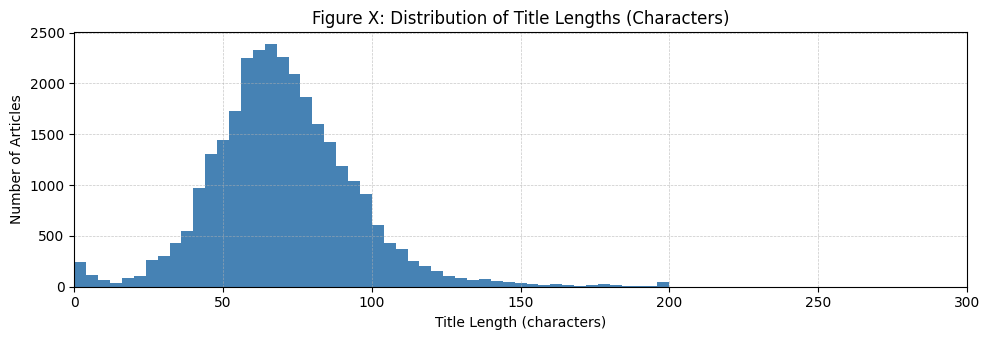

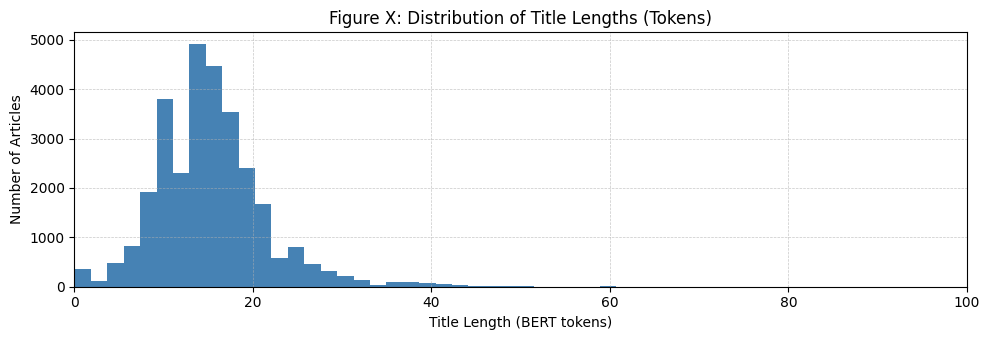

In [20]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from transformers import BertTokenizer

# === CONFIG ===
INPUT_PATH = "/Users/sheillaschool/Documents/final/thesis_final/data/raw/main_dataset/main_dataset.json"
X_CHAR_LIMIT = 300
X_TOKEN_LIMIT = 100

# === LOAD DATA ===
with open(INPUT_PATH, "r", encoding="utf-8") as f:
    data = json.load(f)

df = pd.DataFrame.from_dict(data, orient="index")
df["title"] = df["title"].fillna("")

# === LOAD TOKENIZER ===
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# === COMPUTE LENGTHS ===
df["title_char_len"] = df["title"].apply(len)
df["title_token_len"] = df["title"].apply(lambda x: len(tokenizer.tokenize(x)))

# === PLOT CHARACTERS ===
plt.figure(figsize=(10, 3.5))
plt.hist(df["title_char_len"], bins=50, color="steelblue", edgecolor="none")
plt.xlim(0, X_CHAR_LIMIT)
plt.xlabel("Title Length (characters)")
plt.ylabel("Number of Articles")
plt.title("Figure X: Distribution of Title Lengths (Characters)")
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

# === PLOT TOKENS ===
plt.figure(figsize=(10, 3.5))
plt.hist(df["title_token_len"], bins=50, color="steelblue", edgecolor="none")
plt.xlim(0, X_TOKEN_LIMIT)
plt.xlabel("Title Length (BERT tokens)")
plt.ylabel("Number of Articles")
plt.title("Figure X: Distribution of Title Lengths (Tokens)")
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


In [5]:
# === FILTER OUT SHORT SUMMARIES ===
q1 = df["summary_length"].quantile(0.25)
initial_count = len(df)
df_filtered = df[df["summary_length"] >= q1].copy()
final_count = len(df_filtered)
removed_count = initial_count - final_count

# === REPORT ===
print(f"\n✅ Articles before filtering: {initial_count}")
print(f"🧹 Articles after filtering: {final_count}")
print(f"🗑️ Removed: {removed_count} articles ({removed_count / initial_count:.2%})")

# === DROP TEMP COLUMN & SAVE ===
df_filtered = df_filtered.drop(columns=["summary_length"])
OUTPUT_PATH = "/Users/sheillaschool/Documents/final/thesis_final/data/raw/main_dataset_cleaned_1.json"

df_filtered_dict = df_filtered.to_dict(orient="index")
with open(OUTPUT_PATH, "w", encoding="utf-8") as f:
    json.dump(df_filtered_dict, f, indent=2, ensure_ascii=False)

print(f"\n💾 Cleaned dataset saved to: {OUTPUT_PATH}")



✅ Articles before filtering: 29734
🧹 Articles after filtering: 22380
🗑️ Removed: 7354 articles (24.73%)

💾 Cleaned dataset saved to: /Users/sheillaschool/Documents/final/thesis_final/data/raw/main_dataset_cleaned_1.json


**checking the best ref date**

📌 Top Reference Dates:
  reference_date  bin_0  bin_10  bin_30  bin_60  bin_90
0     2025-02-08    190     155     258     668   10492
1     2025-02-09    188     157     272     661   10536
2     2024-12-31    183     113     271     750    8599
3     2025-01-18    175     135     299     711    9488
4     2024-12-17    172     127     296     649    7999


/var/folders/36/9xwcvlgn3v15668c8s8lfgd80000gq/T/ipykernel_29848/1918300248.py:57: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/sheillaschool/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


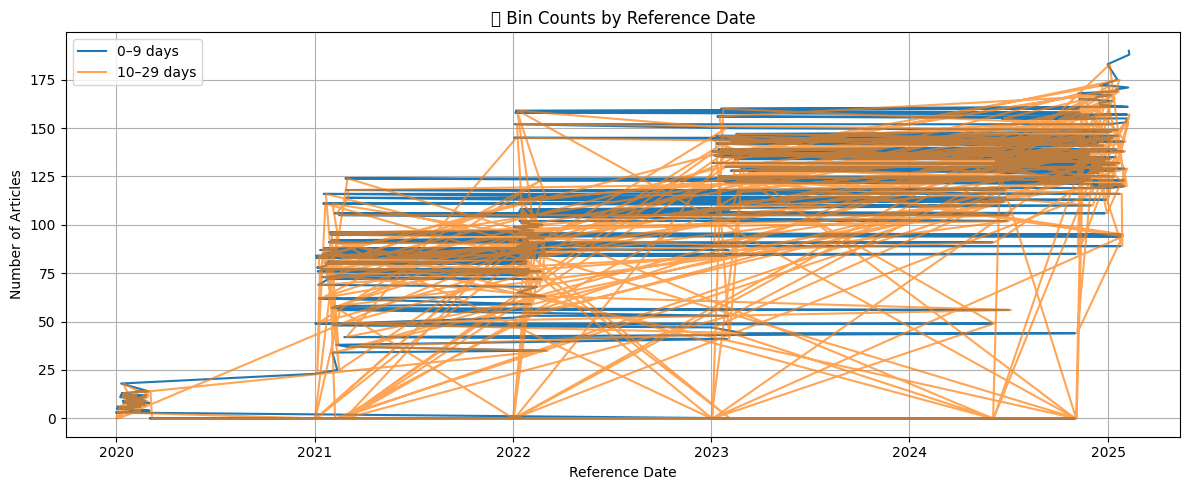

In [2]:
import json
import pandas as pd
from datetime import datetime

# === CONFIG ===
FILE_PATH = "/Users/sheillaschool/Documents/final/thesis_final/data/raw/main_dataset/raw/main_dataset_4_cleaned_eda_after_spacy.json"
DATE_FORMAT = "%Y-%m-%d"

# === LOAD DATA ===
with open(FILE_PATH, "r", encoding="utf-8") as f:
    data = json.load(f)

df = pd.DataFrame.from_dict(data, orient="index")
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df = df.dropna(subset=["date"])

# === SEARCH SPACE: Possible Reference Dates ===
search_dates = pd.date_range(df["date"].min(), df["date"].max())

# === SEARCH LOGIC ===
results = []

for ref_date in search_dates:
    df["t_days"] = (ref_date - df["date"]).dt.days

    bin_0 = df[(df["t_days"] >= 0) & (df["t_days"] < 3)].shape[0]
    bin_7 = df[(df["t_days"] >= 4) & (df["t_days"] < 7)].shape[0]
    bin_30 = df[(df["t_days"] >= 8) & (df["t_days"] < 14)].shape[0]
    bin_60 = df[(df["t_days"] >= 15) & (df["t_days"] < 30)].shape[0]
    bin_90 = df[df["t_days"] >= 30].shape[0]

    results.append((ref_date, bin_0, bin_7, bin_30, bin_60, bin_90))

# === RESULTS TABLE ===
results_df = pd.DataFrame(results, columns=[
    "reference_date", "bin_0", "bin_10", "bin_30", "bin_60", "bin_90"
])

# === SORT BY Bin 0 (then optionally Bin 7) ===
results_df = results_df.sort_values(by=["bin_0", "bin_10"], ascending=False).reset_index(drop=True)

# === DISPLAY TOP RESULTS ===
print("📌 Top Reference Dates:")
print(results_df.head())

# === OPTIONAL PLOT ===
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(results_df["reference_date"], results_df["bin_0"], label="0–9 days")
plt.plot(results_df["reference_date"], results_df["bin_10"], label="10–29 days", alpha=0.7)
plt.title("🗓️ Bin Counts by Reference Date")
plt.xlabel("Reference Date")
plt.ylabel("Number of Articles")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [10]:
import json
import pandas as pd
from rapidfuzz import fuzz

# === CONFIG ===
FILE_PATH = "/Users/sheillaschool/Documents/final/thesis_final/data/raw/main_dataset/main_dataset_cleaned_1.json"
SIMILARITY_THRESHOLD = 95

# === LOAD DATA ===
with open(FILE_PATH, "r", encoding="utf-8") as f:
    data = json.load(f)

df = pd.DataFrame.from_dict(data, orient="index")

# === TEMP CLEAN BODY FOR EXACT MATCH ===
def normalize_text(text):
    return str(text).strip().lower().replace("\n", " ").replace("\r", " ")

df["temp_clean_body"] = df["body"].apply(normalize_text)
df["temp_clean_title"] = df["title"].apply(normalize_text)

# === COUNT EXACT DUPLICATES ===
exact_dupes = df.duplicated(subset=["temp_clean_title", "temp_clean_body"], keep=False)
num_exact = exact_dupes.sum()
print(f"🔁 Exact duplicates (same normalized title + body): {num_exact}")

# === CHECK NEAR DUPLICATES IN TITLES ===
titles = df["temp_clean_title"].tolist()
near_dupe_indices = set()
seen = set()

print("🔍 Scanning for near-duplicate titles...")

for i in range(len(titles)):
    if i in seen:
        continue
    for j in range(i + 1, len(titles)):
        if j in seen:
            continue
        score = fuzz.token_sort_ratio(titles[i], titles[j])
        if score >= SIMILARITY_THRESHOLD:
            near_dupe_indices.add(j)
    seen.add(i)

print(f"🧐 Near-duplicate titles (≥ {SIMILARITY_THRESHOLD}% similarity): {len(near_dupe_indices)}")

# === CLEAN-UP TEMP FIELDS (optional, if not saved yet)
df = df.drop(columns=["temp_clean_body", "temp_clean_title"])


🔁 Exact duplicates (same normalized title + body): 5346
🔍 Scanning for near-duplicate titles...
🧐 Near-duplicate titles (≥ 95% similarity): 5724


In [11]:
# === RECREATE NORMALIZED FIELDS ===
df["temp_clean_body"] = df["body"].apply(normalize_text)
df["temp_clean_title"] = df["title"].apply(normalize_text)

# === REMOVE EXACT DUPLICATES ===
df_no_exact = df.drop_duplicates(subset=["temp_clean_title", "temp_clean_body"])
print(f"✅ Removed {len(df) - len(df_no_exact)} exact duplicates")

# === DETECT NEAR-DUPLICATE TITLES AGAIN ===
titles = df_no_exact["temp_clean_title"].tolist()
seen = set()
near_dupe_indices = set()

for i in range(len(titles)):
    if i in seen:
        continue
    for j in range(i + 1, len(titles)):
        if j in seen:
            continue
        score = fuzz.token_sort_ratio(titles[i], titles[j])
        if score >= SIMILARITY_THRESHOLD:
            near_dupe_indices.add(j)
    seen.add(i)

# === REMOVE NEAR DUPLICATES ===
df_final = df_no_exact.drop(df_no_exact.index[list(near_dupe_indices)])
print(f"🧹 Removed {len(df_no_exact) - len(df_final)} near-duplicate titles")
print(f"📦 Final article count: {len(df_final)}")

# === CLEAN-UP TEMP COLUMNS AND SAVE ===
df_final = df_final.drop(columns=["temp_clean_body", "temp_clean_title"])
df_final_dict = df_final.to_dict(orient="index")

with open(FILE_PATH, "w", encoding="utf-8") as f:
    json.dump(df_final_dict, f, indent=2, ensure_ascii=False)

print(f"\n💾 Cleaned dataset saved to: {FILE_PATH}")


✅ Removed 4238 exact duplicates
🧹 Removed 1486 near-duplicate titles
📦 Final article count: 16656

💾 Cleaned dataset saved to: /Users/sheillaschool/Documents/final/thesis_final/data/raw/main_dataset/main_dataset_cleaned_1.json


In [14]:
import json
import pandas as pd
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException

# Ensure consistent results
DetectorFactory.seed = 42

# === CONFIG ===
FILE_PATH = "/Users/sheillaschool/Documents/final/thesis_final/data/raw/main_dataset/main_dataset_cleaned_1.json"

# === LOAD DATA ===
with open(FILE_PATH, "r", encoding="utf-8") as f:
    data = json.load(f)

df = pd.DataFrame.from_dict(data, orient="index")

# === DETECT LANGUAGE ===
def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return "unknown"

print("🌍 Detecting language of each article...")
df["detected_lang"] = df["body"].astype(str).apply(detect_language)

# === SHOW LANGUAGE STATS ===
lang_counts = df["detected_lang"].value_counts()
print("\n📊 Detected Language Distribution:")
print(lang_counts)


🌍 Detecting language of each article...

📊 Detected Language Distribution:
detected_lang
en         15973
unknown      312
hr           116
es            95
vi            57
tr            35
ru            21
el            15
fr            13
nl            13
so             2
bg             1
id             1
no             1
et             1
Name: count, dtype: int64


✅ Normalized fields added and saved to: /Users/sheillaschool/Documents/final/thesis_final/data/raw/main_dataset/main_dataset_cleaned_1_restored.json
